In [9]:
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from skl_groups.divergences import KNNDivergenceEstimator
from skl_groups.features import Features

In [11]:
mvn = np.random.multivariate_normal

In [12]:
np.random.multivariate_normal?

In [13]:
sample1 = mvn([0.,0.], np.identity(2), size=100)

In [14]:
sample2 = mvn([0.,0.], np.identity(2), size=100)

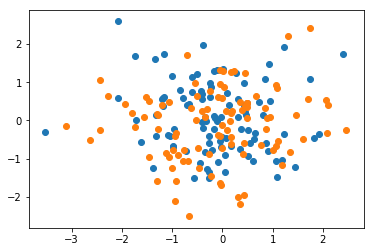

In [15]:
plt.scatter(sample1[:,0], sample1[:,1])
plt.scatter(sample2[:,0], sample2[:,1])

In [19]:
kNN = KNNDivergenceEstimator(div_funcs=["renyi:.8"], Ks=[3], version='fast')

In [20]:
kNN.fit(sample1, y=sample2)

TypeError: must pass n_pts if passing stacked array of features

In [23]:
Features?

In [26]:
x = np.reshape([0., 1, 3], (3, 1))
y = np.reshape([.2, 1.2, 3.2, 7.2], (4, 1))

n = x.shape[0]
m = y.shape[0]

x_to_y = np.log(m / (n-1)) + 1/n * (
        np.log(1.2 / 3) + np.log(.8 / 2) + np.log(1.8 / 3))
y_to_x = np.log(n / (m-1)) + 1/m * (
        np.log(.8 / 3) + np.log(1.2 / 2) + np.log(2.2 / 3) + np.log(6.2 / 6))

#msg = "got {}, expected {}"
est = KNNDivergenceEstimator(div_funcs=['kl'], Ks=[2], clamp=False)
res = est.fit_transform([x, y]).squeeze()
print res

[[ 0.         -0.08798852]
 [-0.52748662  0.        ]]


Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs
Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs


In [34]:
bags = Features([np.random.randn(np.random.randint(30, 100), 5)
                         for _ in xrange(2)])

div_funcs = ('kl', 'js', 'renyi:.9', 'l2', 'tsallis:.8')
Ks = (3, 4)
#get_est = partial(KNNDivergenceEstimator, div_funcs=div_funcs, Ks=Ks)
#for version in ('best'):#, 'slow', 'best'):
est = KNNDivergenceEstimator(div_funcs=div_funcs, Ks=Ks)#, version=version)
results = est.fit_transform(bags)
print results.shape
print results

(5, 2, 2, 2)
[[[[  0.00000000e+00   1.65039096e-02]
   [  2.62783878e-02   0.00000000e+00]]

  [[  0.00000000e+00   1.67491153e-01]
   [  0.00000000e+00   0.00000000e+00]]]


 [[[  0.00000000e+00   0.00000000e+00]
   [  0.00000000e+00   0.00000000e+00]]

  [[  0.00000000e+00   0.00000000e+00]
   [  0.00000000e+00   0.00000000e+00]]]


 [[[ -0.00000000e+00   0.00000000e+00]
   [  1.38330730e-02  -0.00000000e+00]]

  [[ -0.00000000e+00   1.47218823e-01]
   [  0.00000000e+00  -0.00000000e+00]]]


 [[[  0.00000000e+00   1.00884661e-02]
   [  1.00884661e-02   0.00000000e+00]]

  [[  0.00000000e+00   2.46471316e-02]
   [  2.46471316e-02   0.00000000e+00]]]


 [[[ -0.00000000e+00   0.00000000e+00]
   [  2.14576721e-05  -0.00000000e+00]]

  [[ -0.00000000e+00   1.25561655e-01]
   [  0.00000000e+00  -0.00000000e+00]]]]


Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs
Using 'slow' version of KNNDivergenceEstimator,  because skl_groups_accel isn't available; its 'fast' version is much faster on large problems. Pass version='slow' to suppress this warning. 
  No module named skl_groups_accel.knn_divs
